### An Introduction to Machine Learning for Bioinformatics
#### Present by Matin Ghasemi

In this notebook, we'll create a simple machine learning model to predict the chance of a heart attack using a kaggle dataset. This project is designed for educational purposes, aiming to help students understand the basics of machine learning while addressing a real-world health scenario.

## Dataset info:
link: https://www.kaggle.com/datasets/rashikrahmanpritom/heart-attack-analysis-prediction-dataset

#### columns info
**Age:** Age of the patient. <br>
**Sex:** Sex of the patient.<br>
**exang:** Exercise-induced angina (1 = yes; 0 = no).<br>
**Angina = Chest pain ca:** Number of major vessels (0-3). The variable "ca" with values ranging from 0 to 3 represents the number of major blood vessels (coronary arteries) that are colored or visualized during the fluoroscopy procedure. Each value corresponds to a different degree of vessel involvement: ca = 0: Indicates that there is no significant coloration of the vessels, suggesting a potential absence of major vessel blockages. ca = 1: Implies that one major vessel is colored, indicating a partial blockage or disease in one of the coronary arteries. ca = 2: Suggests that two major vessels are colored, signifying a more extensive blockage or disease involving multiple coronary arteries. ca = 3: Indicates that three major vessels are colored, suggesting a severe blockage or disease affecting most of the coronary arteries.<br>
**cp:** Chest pain type.
* Typical Angina (Value 1): Substernal discomfort or pain, often squeezing or heaviness, triggered by exertion, indicative of coronary artery disease.
* Atypical Angina (Value 2): Non-classic symptoms, variations in pain characteristics, may not be clearly associated with physical exertion.
* Non-Anginal Pain (Value 3): Sharp or stabbing pain, not typical of angina, may have non-cardiac causes like musculoskeletal or gastrointestinal issues.
* Asymptomatic (Value 4): Absence of chest pain or discomfort, patient reports no symptoms related to chest pain, requiring further assessment of other risk factors.

**trtbps:** Resting blood pressure (in mm Hg).<br>
**chol:** Cholesterol in mg/dl fetched via BMI sensor.<br>
**fbs:** Fasting blood sugar > 120 mg/dl (1 = true; 0 = false).<br>
**rest_ecg:** Resting electrocardiographic results.<br>
* Value 0: Normal
* Value 1: Having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
* Value 2: Showing probable or definite left ventricular hypertrophy by Estes' criteria

**thalach:** Maximum heart rate achieved.<br>
**target:** 0 = Less chance of a heart attack, 1 = More chance of a heart attack.

### Importing libraies

In [ ]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Read data and getting familiar with it

In [ ]:
df = pd.read_csv('data/heart.csv')

In [ ]:
df.head()

age  sex  cp  trtbps  chol  fbs  restecg  thalachh  exng  oldpeak  slp  \
0   63    1   3     145   233    1        0       150     0      2.3    0   
1   37    1   2     130   250    0        1       187     0      3.5    0   
2   41    0   1     130   204    0        0       172     0      1.4    2   
3   56    1   1     120   236    0        1       178     0      0.8    2   
4   57    0   0     120   354    0        1       163     1      0.6    2   

   caa  thall  output  
0    0      1       1  
1    0      2       1  
2    0      2       1  
3    0      2       1  
4    0      2       1

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


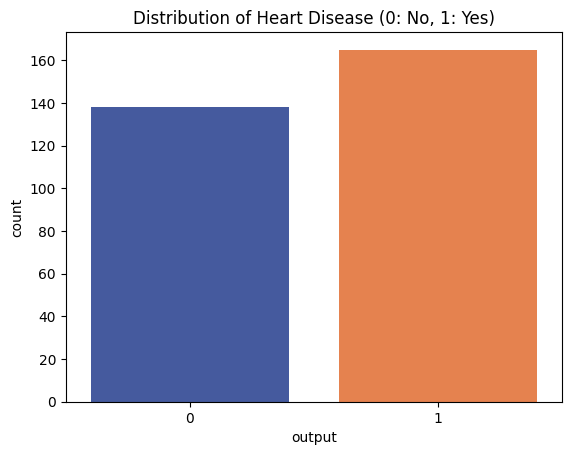

In [ ]:
sns.countplot(x='output', data=df, palette=['#3652AD', '#FE7A36'])
plt.title('Distribution of Heart Disease (0: No, 1: Yes)')
plt.show()

#### Coreelation plot

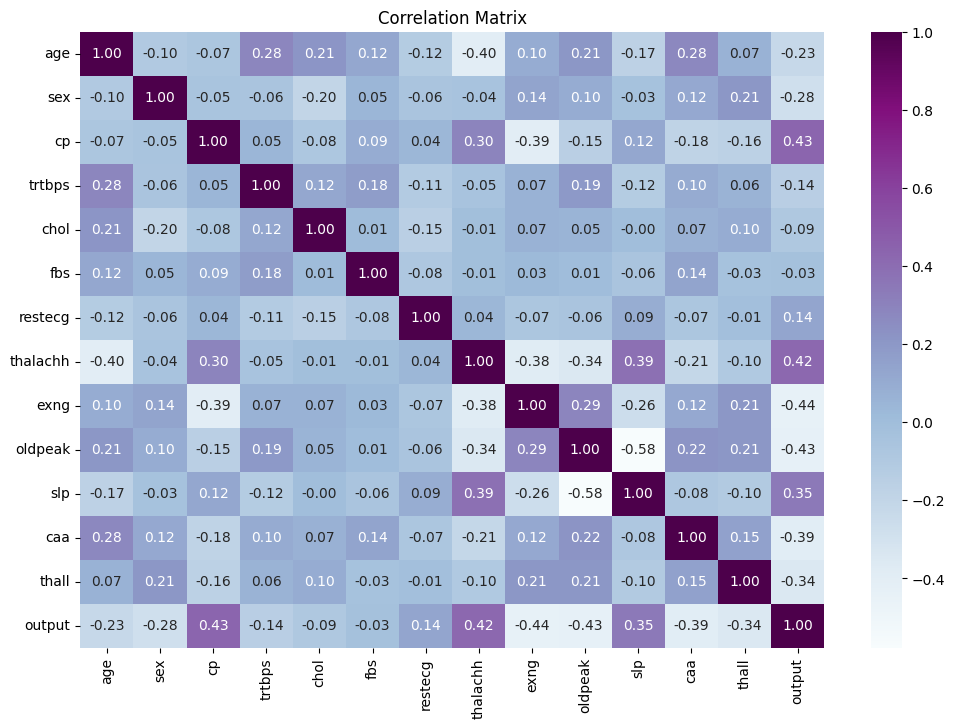

In [ ]:
correlation_matrix = df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='BuPu', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

#### Feature distribution

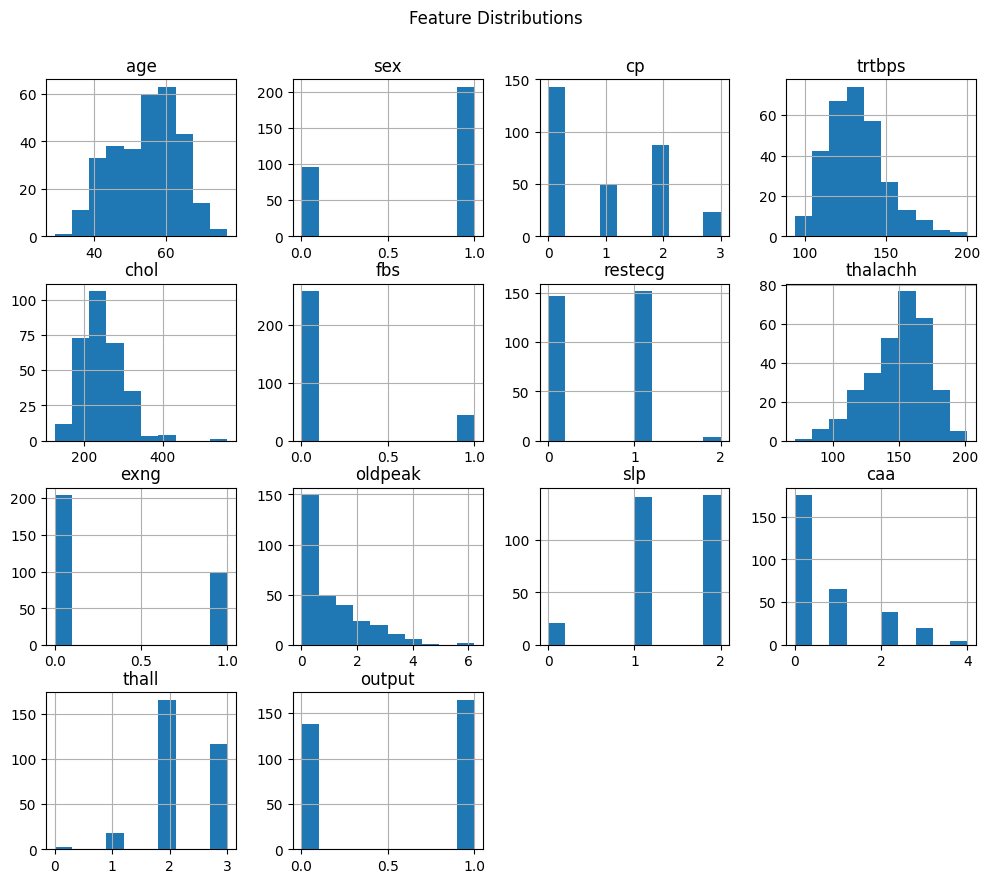

In [ ]:
df.hist(figsize=(12, 10))
plt.suptitle('Feature Distributions', x=0.5, y=0.95, ha='center',fontsize='large')
plt.show()

#### Categorical features

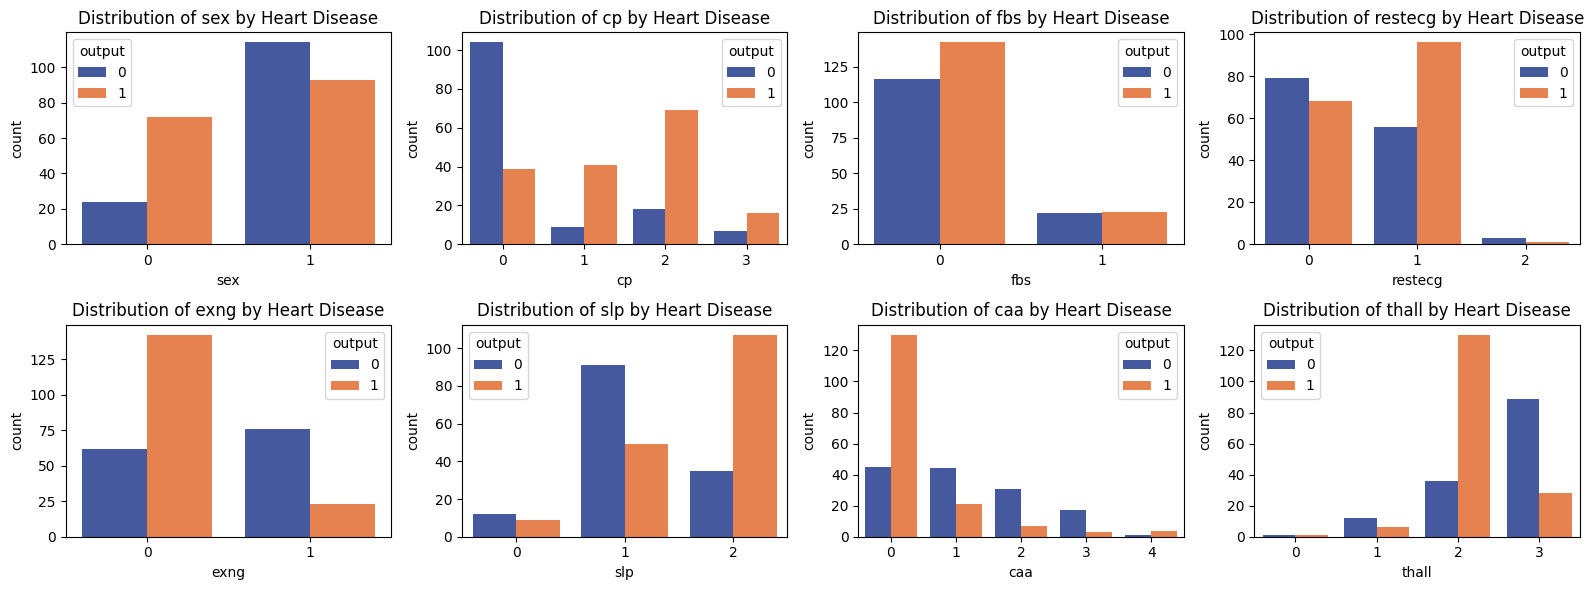

In [ ]:
categorical_features = ['sex', 'cp', 'fbs', 'restecg', 'exng', 'slp', 'caa', 'thall']

fig, axes = plt.subplots(2, 4, figsize=(16, 6))

for i, feature in enumerate(categorical_features):
    row_index = i // 4
    col_index = i % 4

    sns.countplot(x=feature, hue='output', data=df, palette=['#3652AD', '#FE7A36'], ax=axes[row_index, col_index])
    axes[row_index, col_index].set_title(f'Distribution of {feature} by Heart Disease')

plt.tight_layout()
plt.show()

#### Age distribution

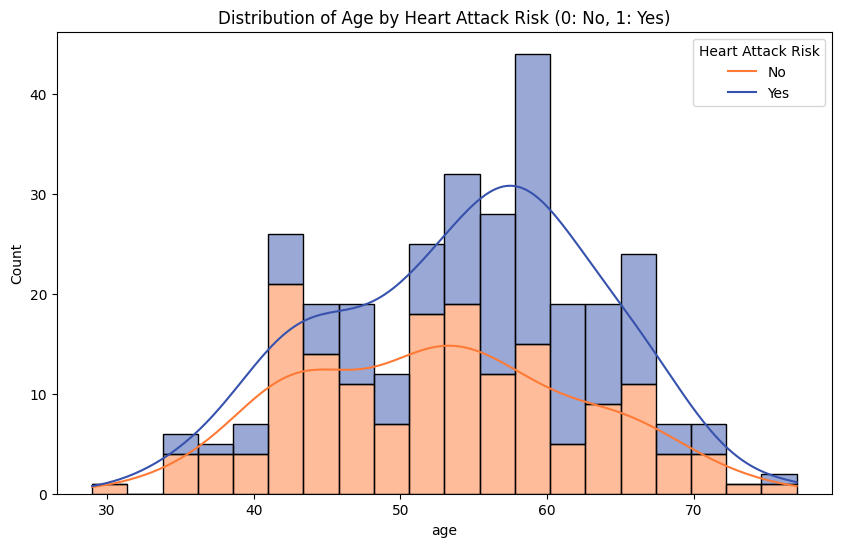

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(x='age', data=df, bins=20, kde=True, hue='output', multiple='stack', palette=['#3652AD', '#FE7A36'])
plt.title('Distribution of Age by Heart Attack Risk (0: No, 1: Yes)')
plt.legend(title='Heart Attack Risk', labels=['No', 'Yes'])
plt.show()

#### Noise identification

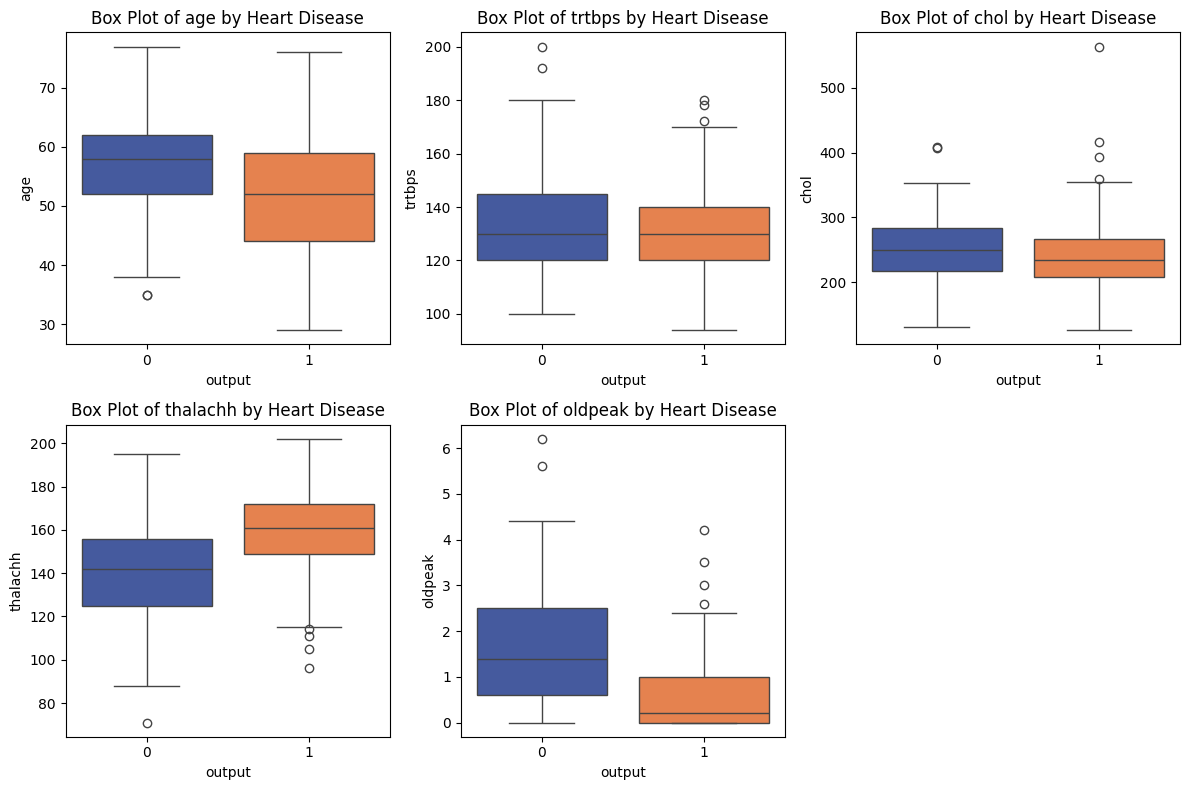

In [ ]:
numerical_features = ['age', 'trtbps', 'chol', 'thalachh', 'oldpeak']

plt.figure(figsize=(12, 8))
for i, feature in enumerate(numerical_features, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(x='output', y=feature, data=df, palette=['#3652AD', '#FE7A36'])
    plt.title(f'Box Plot of {feature} by Heart Disease')

plt.tight_layout()
plt.show()

In [ ]:
df = df[df['chol'] <= 500]

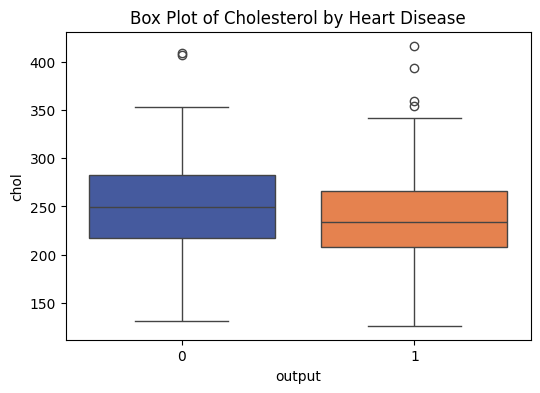

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 4))
sns.boxplot(x='output', y='chol', data=df, palette=['#3652AD', '#FE7A36'])
plt.title('Box Plot of Cholesterol by Heart Disease')
plt.show()

#### Train and test dataset

In [ ]:
X = df.drop('output', axis=1)
y = df['output']

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
X_train_scaled

array([[-1.38837787,  0.6917569 , -0.02009475, ...,  0.95470977,
        -0.68510386, -0.55822374],
       [ 1.53152348,  0.6917569 ,  0.94847216, ..., -0.67709913,
        -0.68510386,  1.14471197],
       [ 1.42337899,  0.6917569 , -0.98866165, ..., -0.67709913,
         1.26886099,  1.14471197],
       ...,
       [-0.95579989, -1.44559455, -0.98866165, ..., -0.67709913,
        -0.68510386, -0.55822374],
       [ 0.77451202,  0.6917569 ,  1.91703906, ..., -0.67709913,
         1.26886099, -0.55822374],
       [-1.28023337,  0.6917569 ,  0.94847216, ..., -2.30890803,
        -0.68510386,  1.14471197]])

In [ ]:
print(f'Length of training data: {len(X_train_scaled)}')
print(f'Length of test data: {len(X_test_scaled)}')

Length of training data: 241
Length of test data: 61


### Models

### Logistic Regression
Logistic Regression is a statistical method used for binary classification problems, where the outcome variable is categorical and has two classes. In simpler terms, it's like fitting a line to predict whether something is in one category or another.

#### Define model and fit it to data

In [ ]:
from sklearn.linear_model import LogisticRegression

model_lr = LogisticRegression()
model_lr.fit(X_train_scaled, y_train)

LogisticRegression()

#### Make prediction

In [ ]:
y_pred = model_lr.predict(X_test_scaled)

#### Model evaluation

In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

accuracy_lr = accuracy_score(y_test, y_pred)
print(f'Logistic Regression Accuracy: {accuracy_lr:.2f}')
print('Classification Report:\n', classification_report(y_test, y_pred))

NameError: name 'accuracy' is not defined

#### Confusion matrix

In [ ]:
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap=sns.color_palette(['#3652AD', '#FE7A36']))
plt.title('Confusion Matrix - Logistic Regression')
plt.xlabel('Actual values')
plt.ylabel('Predicted values')
plt.show()

### Random Forest
Random Forest is a versatile and powerful machine learning algorithm. Think of it as a collection of decision trees working together to make predictions. Each tree in the forest is trained on a different subset of the data and makes its own prediction. When you want to make a prediction, each tree votes on the outcome, and the majority vote becomes the final prediction. This ensemble approach often results in more accurate and robust predictions compared to individual decision trees, making Random Forest a popular choice for various predictive tasks.

#### Define model and fit it to data

In [ ]:
from sklearn.ensemble import RandomForestClassifier

model_rf = RandomForestClassifier(random_state=42)
model_rf.fit(X_train_scaled, y_train)

#### Make prediction

In [ ]:
y_pred_rf = model_rf.predict(X_test_scaled)

#### Model evaluation

In [ ]:
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f'Random Forest Accuracy: {accuracy_rf:.2f}')
print('Classification Report:\n', classification_report(y_test, y_pred_rf))

#### Confusion matrix

In [ ]:
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred_rf), annot=True, fmt='d', cmap=sns.color_palette(['#3652AD', '#FE7A36']))
plt.title('Confusion Matrix - Random Forest')
plt.xlabel('Actual values')
plt.ylabel('Predicted values')
plt.show()

### Support Vector Machine (SVM)
Support Vector Machine (SVM) is a machine learning algorithm that excels classification and regression tasks. Picture it as a line or boundary that best separates different groups in your data.

For classification, SVM aims to draw a line (or hyperplane in higher dimensions) in such a way that it maximizes the margin between different classes. The "support vectors" are the data points that are closest to the decision boundary.

#### Define model and fit it to data

In [ ]:
from sklearn.svm import SVC

model_svm = SVC(kernel='linear', random_state=42)
model_svm.fit(X_train_scaled, y_train)

#### Make prediction

In [ ]:
y_pred_svm = model_svm.predict(X_test_scaled)

#### Model evaluation

In [ ]:
accuracy_svm = accuracy_score(y_test, y_pred_svm)
print(f'SVM Accuracy: {accuracy_svm:.2f}')
print('Classification Report:\n', classification_report(y_test, y_pred_svm))

#### Confusion matrix

In [ ]:
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred_svm), annot=True, fmt='d', cmap=sns.color_palette(['#3652AD', '#FE7A36']))
plt.title('Confusion Matrix - SVM')
plt.xlabel('Actual values')
plt.ylabel('Predicted values')
plt.show()

### K-Nearest Neighbors

K-Nearest Neighbors (KNN) is a straightforward and intuitive machine learning algorithm. Imagine you have a dataset with points on a graph. To predict the class of a new point, KNN looks at the 'k' nearest existing points to it. The majority class among those neighbors determines the class of the new point.

#### Define model and fit it to data

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

model_knn = KNeighborsClassifier()
model_knn.fit(X_train_scaled, y_train)

#### Make prediction

In [ ]:
y_pred_knn = model_knn.predict(X_test_scaled)

#### Model evaluation

In [ ]:
accuracy_knn = accuracy_score(y_test, y_pred_knn)
print(f'KNN Accuracy: {accuracy_knn:.2f}')
print('Classification Report:\n', classification_report(y_test, y_pred_knn))

#### Confusion matrix

In [ ]:
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred_knn), annot=True, fmt='d', cmap=sns.color_palette(['#3652AD', '#FE7A36']))
plt.title('Confusion Matrix - KNN')
plt.xlabel('Actual values')
plt.ylabel('Predicted values')
plt.show()

### Models summary

In [ ]:
models = {'KNN' : accuracy_knn,
          'SVM' : accuracy_svm,
          'Random Forest' : accuracy_rf,
          'Logistic Regression' : accuracy_lr}

accuracy = pd.DataFrame(list(models.items()), columns=['Model', 'Accuracy'])
accuracy